# Implementing an MLP in TensorFlow & Keras

Source:  
Getting started with Tensorflow and Keras. LearnOpenCV.  https://learnopencv.com/implementing-mlp-tensorflow-keras/

In [ ]:
# !pip install seaborn

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
 
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
 
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

2023-11-29 03:54:28.526824: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
# Load data
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()
 
X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]
 
y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]
 
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


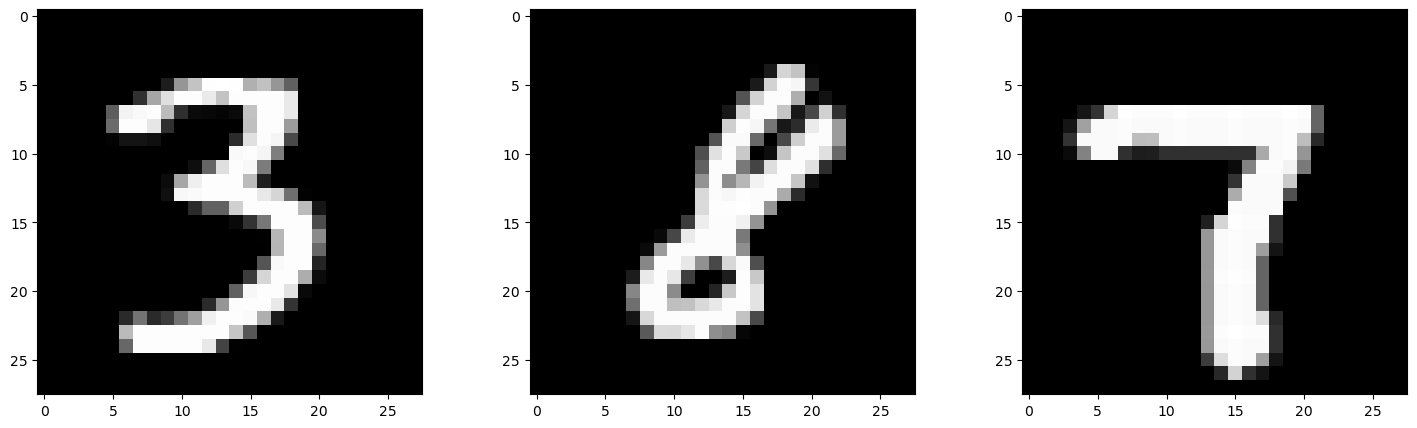

In [4]:
# Plot sample images
plt.figure(figsize=(18, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.axis(True)
    plt.imshow(X_train[i], cmap='gray')
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [5]:
# Data preprocessing
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255
 
X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255
 
X_valid = X_valid.reshape((X_valid.shape[0], 28 * 28))
X_valid = X_valid.astype("float32") / 255

In [6]:
# Convert integer labels to one-hot encoded vectors.
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test  = to_categorical(y_test)

In [7]:
# Integer Label Encoding example
# Load the Fashion MNIST dataset.
((X_train_fashion, y_train_fashion), (_, _)) = fashion_mnist.load_data()
 
# The labels in the Fashion MNIST dataset are encoded as integers.
print(y_train_fashion[0:9])

# One-Hot Label Encoding
y_train_onehot = to_categorical(y_train_fashion[0:9])
print(y_train_onehot)

[9 0 0 3 0 2 7 2 5]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Model implementation

In [8]:
# Instantiate the model.
model = tf.keras.Sequential()
 
# Build the model.
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10,  activation="softmax"))
 
# Display the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


2023-11-29 03:54:40.815162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-29 03:54:40.821021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-29 03:54:40.821614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-29 03:54:40.822628: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [9]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [10]:
training_results = model.fit(X_train, 
                             y_train, 
                             epochs=21, 
                             batch_size=64, 
                             validation_data=(X_valid, y_valid))

Epoch 1/21
782/782 [==============================] - 3s 3ms/step - loss: 0.2780 - accuracy: 0.9184 - val_loss: 0.1816 - val_accuracy: 0.9410
Epoch 2/21
782/782 [==============================] - 2s 3ms/step - loss: 0.1174 - accuracy: 0.9653 - val_loss: 0.1202 - val_accuracy: 0.9641
Epoch 3/21
782/782 [==============================] - 2s 3ms/step - loss: 0.0840 - accuracy: 0.9744 - val_loss: 0.1237 - val_accuracy: 0.9611
Epoch 4/21
782/782 [==============================] - 2s 3ms/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 0.0921 - val_accuracy: 0.9739
Epoch 5/21
782/782 [==============================] - 2s 3ms/step - loss: 0.0509 - accuracy: 0.9839 - val_loss: 0.0937 - val_accuracy: 0.9752
Epoch 6/21
782/782 [==============================] - 2s 3ms/step - loss: 0.0427 - accuracy: 0.9874 - val_loss: 0.0864 - val_accuracy: 0.9775
Epoch 7/21
782/782 [==============================] - 2s 3ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0988 - val_accuracy: 0.9753
Epoch 

## Plot results

In [11]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

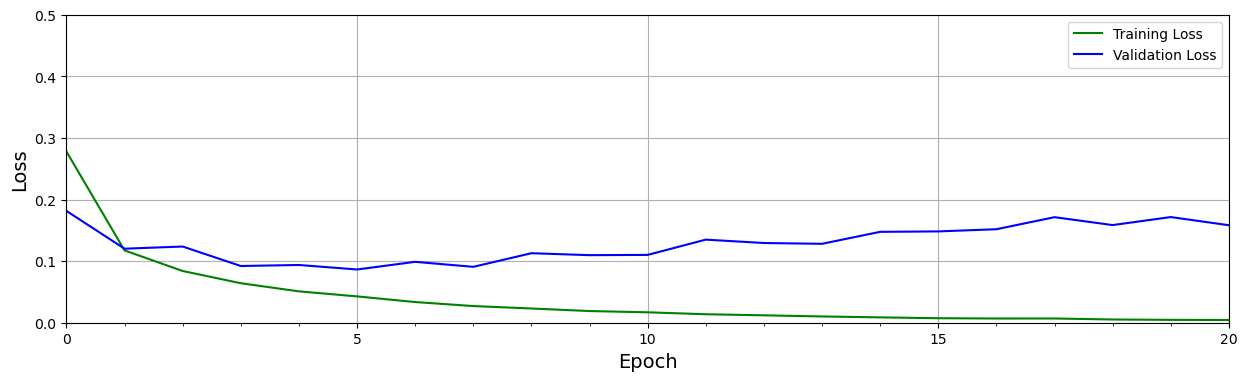

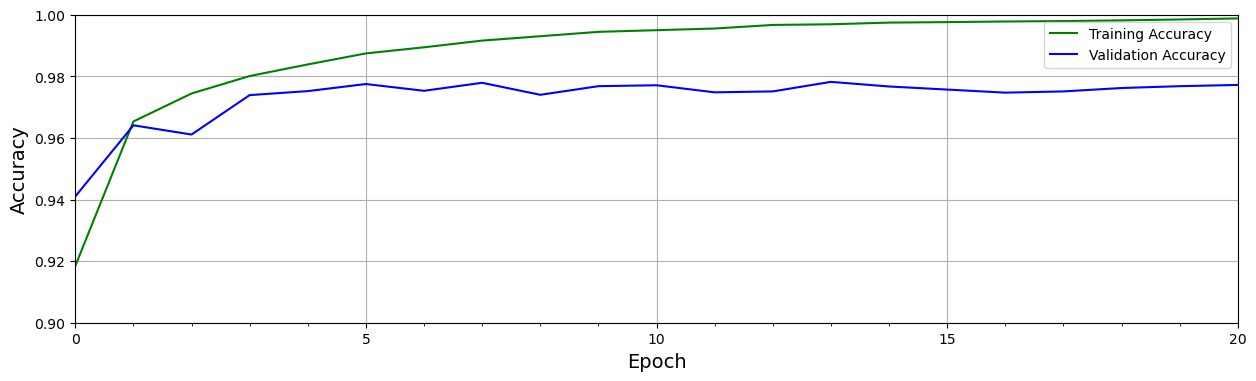

In [12]:
# Retrieve training results.
train_loss = training_results.history["loss"]
train_acc  = training_results.history["accuracy"]
valid_loss = training_results.history["val_loss"]
valid_acc  = training_results.history["val_accuracy"]
 
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 0.5],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.9, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])


## Model evaluation

In [13]:
predictions = model.predict(X_test)
index = 0 # up to 9999
print('Ground truth for test digit: ',y_test[index])
print('\n');
print('Predictions for each class:\n')
for i in range(10):
    print('digit:', i, ' probability: ', predictions[index][i])

313/313 [==============================] - 0s 1ms/step
Ground truth for test digit:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Predictions for each class:

digit: 0  probability:  1.2179384e-21
digit: 1  probability:  2.9355606e-19
digit: 2  probability:  7.846242e-17
digit: 3  probability:  1.2286223e-17
digit: 4  probability:  4.5177793e-26
digit: 5  probability:  7.808212e-22
digit: 6  probability:  1.323359e-32
digit: 7  probability:  1.0
digit: 8  probability:  3.060142e-23
digit: 9  probability:  4.5683917e-15


## Confusion Matrix

In [14]:
import seaborn as sn

In [15]:
# Generate predictions for the test dataset.
predictions = model.predict(X_test)
 
# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]

313/313 [==============================] - 0s 1ms/step


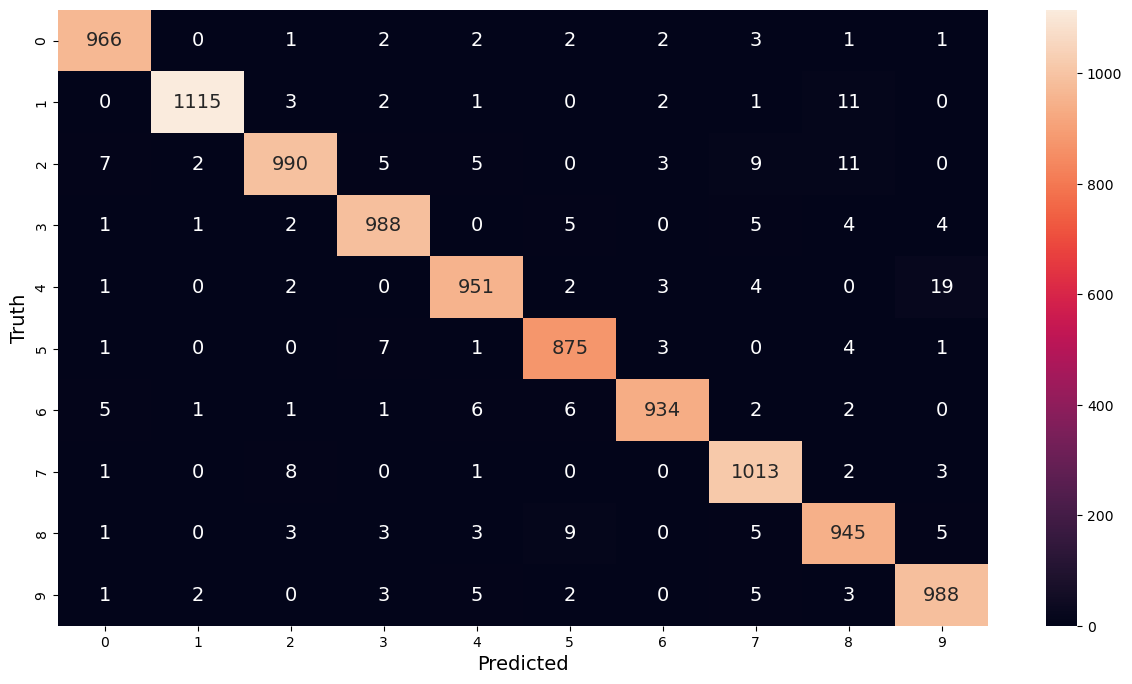

In [16]:
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)
 
# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)
 
# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[15, 8])

sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()